In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import time
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import matplotlib.pyplot as plt

import src
import parameters
from src.reload import deep_reload
from importlib import reload

In [90]:
deep_reload(src)
reload(parameters)

tco={}

parameters_icev_sedan=parameters.parameters_icev_sedan
parameters_icev_cuv=parameters.parameters_icev_cuv
parameters_icev_suv=parameters.parameters_icev_suv

tco['icev_sedan']=src.cost.Vehicle(parameters_icev_sedan)
tco['icev_cuv']=src.cost.Vehicle(parameters_icev_cuv)
tco['icev_suv']=src.cost.Vehicle(parameters_icev_suv)

parameters_hev_sedan=parameters.parameters_hev_sedan
parameters_hev_cuv=parameters.parameters_hev_cuv
parameters_hev_suv=parameters.parameters_hev_suv

tco['hev_sedan']=src.cost.Vehicle(parameters_hev_sedan)
tco['hev_cuv']=src.cost.Vehicle(parameters_hev_cuv)
tco['hev_suv']=src.cost.Vehicle(parameters_hev_suv)

parameters_phev_sedan=parameters.parameters_phev_sedan
parameters_phev_cuv=parameters.parameters_phev_cuv
parameters_phev_suv=parameters.parameters_phev_suv

tco['phev_sedan']=src.cost.Vehicle(parameters_phev_sedan)
tco['phev_cuv']=src.cost.Vehicle(parameters_phev_cuv)
tco['phev_suv']=src.cost.Vehicle(parameters_phev_suv)

parameters_bev_sedan=parameters.parameters_bev_sedan
# parameters_bev_sedan['range_extension']='replace'
parameters_bev_cuv=parameters.parameters_bev_cuv
parameters_bev_suv=parameters.parameters_bev_suv

tco['bev_sedan']=src.cost.Vehicle(parameters_bev_sedan)
tco['bev_cuv']=src.cost.Vehicle(parameters_bev_cuv)
tco['bev_suv']=src.cost.Vehicle(parameters_bev_suv)

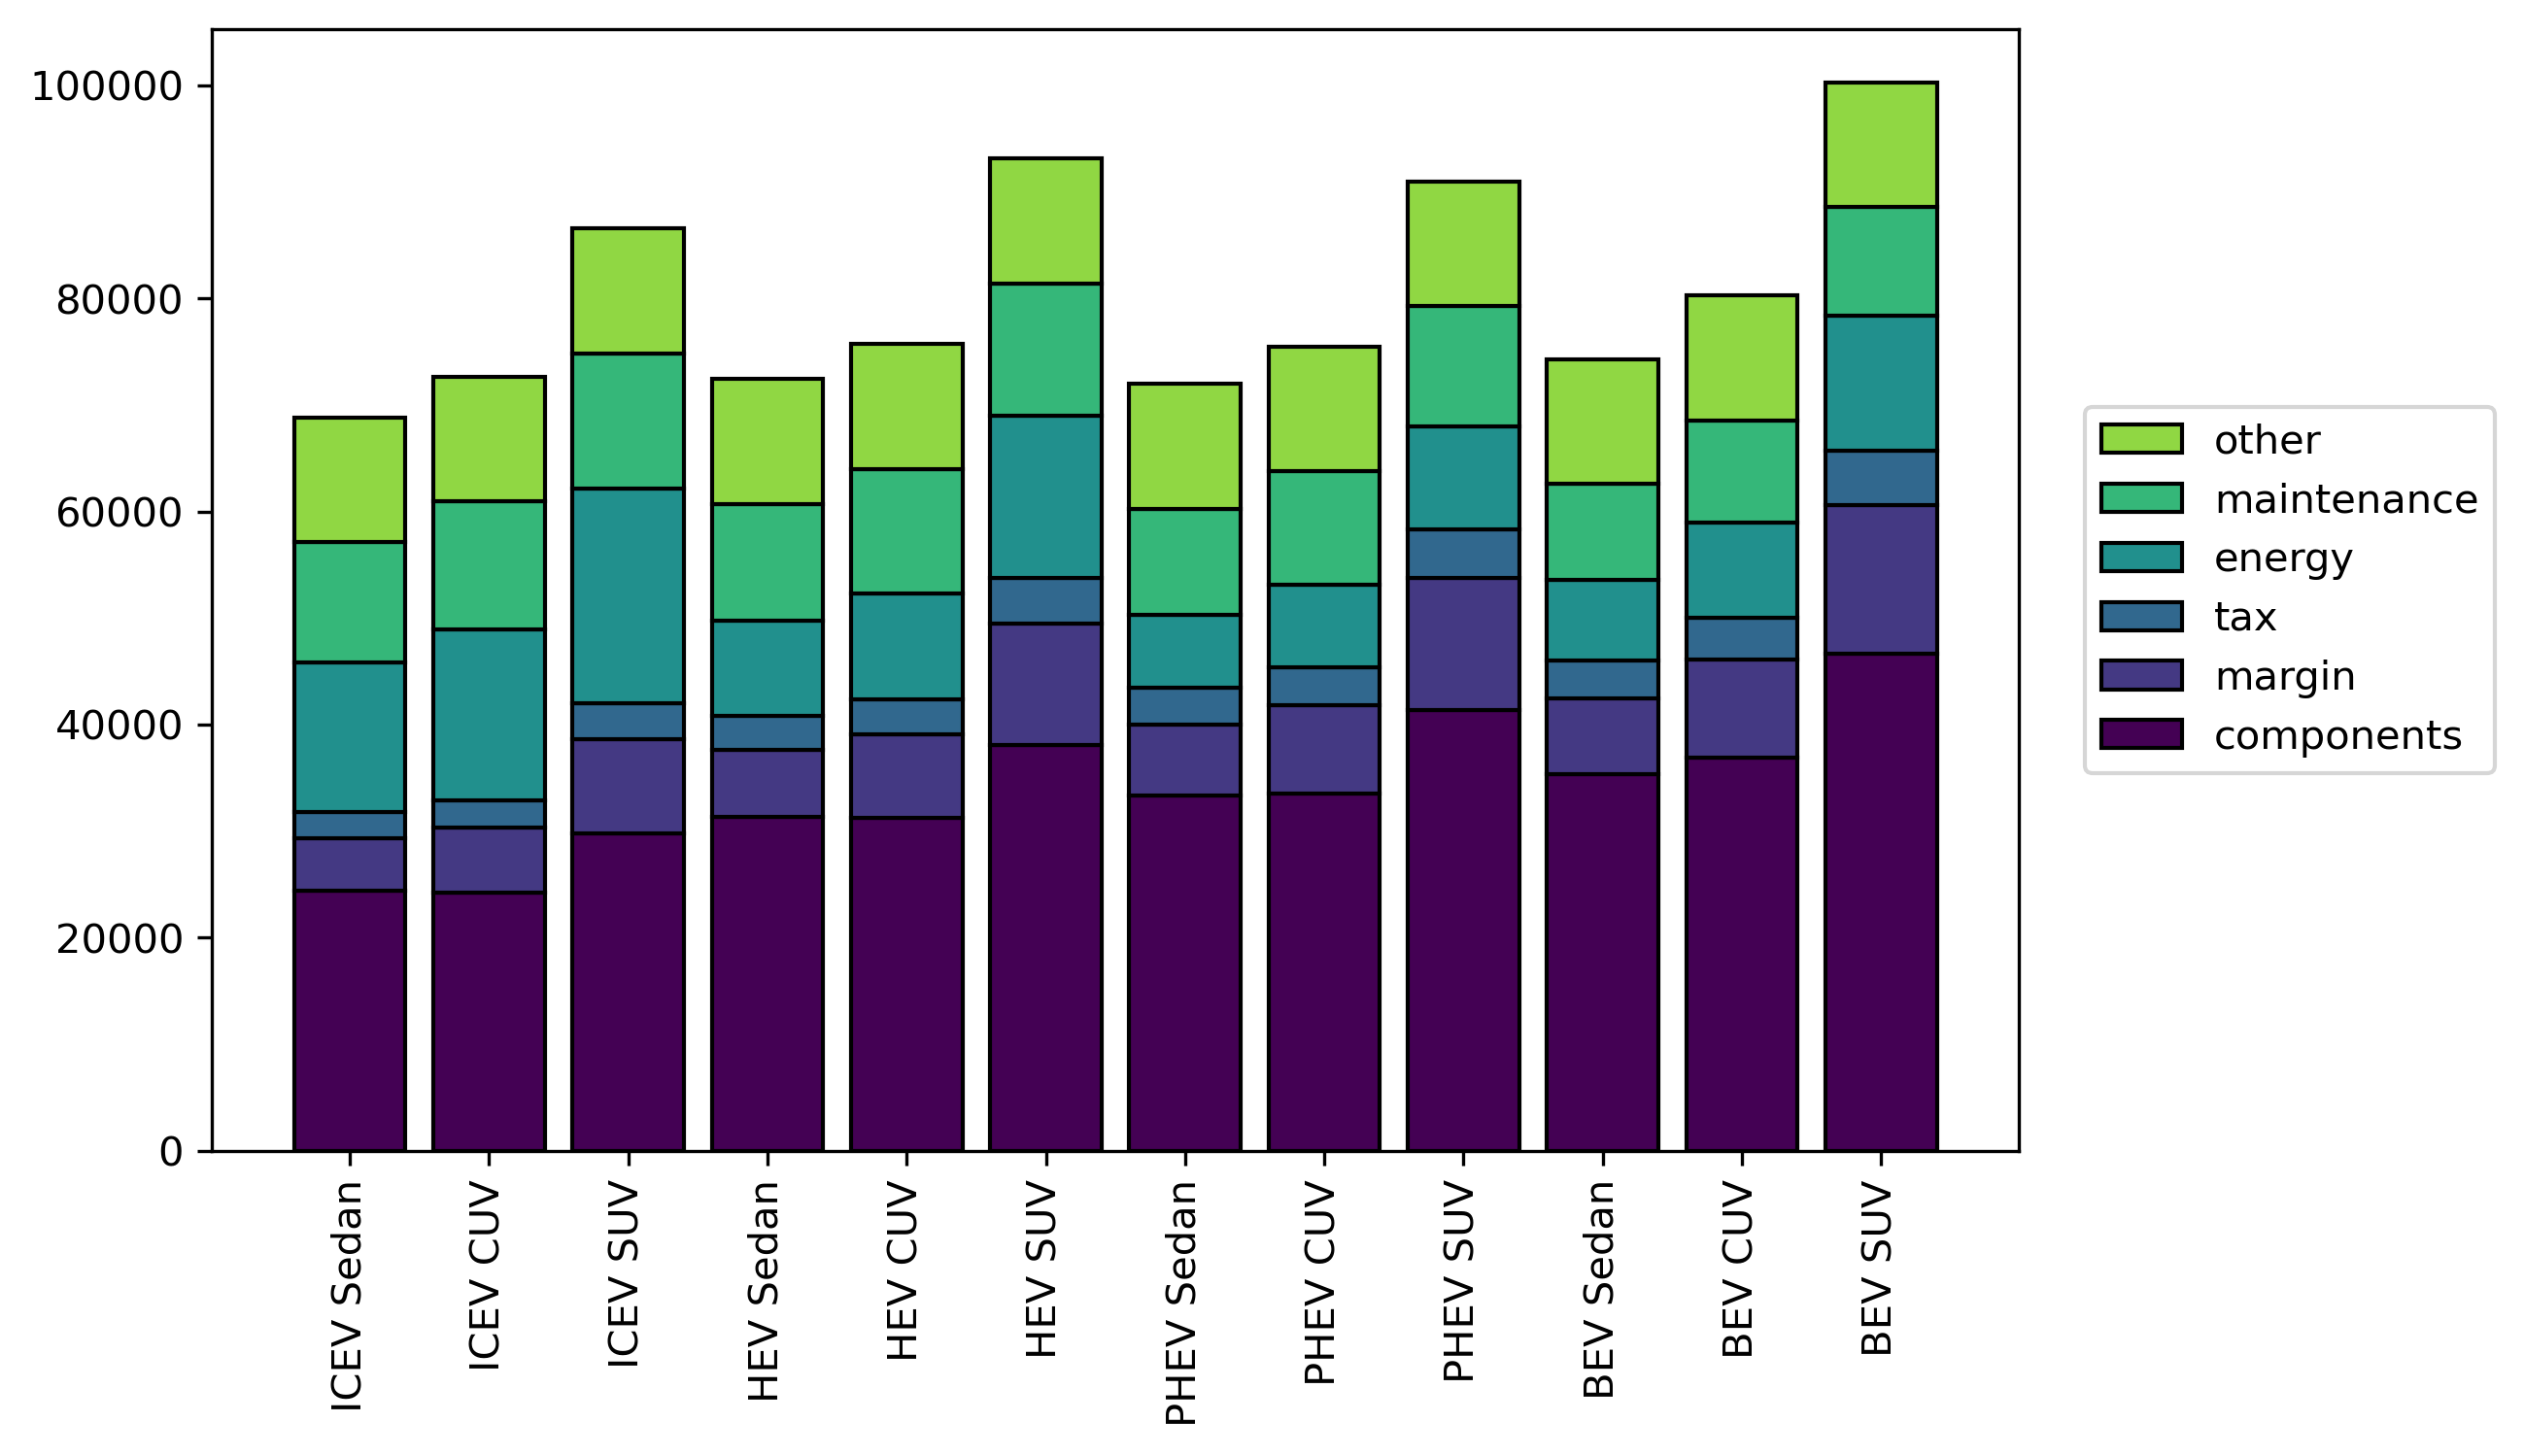

In [115]:
deep_reload(src)

fields=['components','margin','tax','energy','maintenance','other']

data_dict={}

for field in fields:
    data_dict[field]=[]
    for key in tco.keys():
        data_dict[field].append(tco[key].costs[field])

fig,ax=plt.subplots(figsize=(8,5),dpi=300)

axes_kwargs={}

bar_kwargs={
    'ec':'k'
}

legend_kwargs={
    'bbox_to_anchor':(1.15,.5),
    'loc':'center'
}

src.figures.PlotStackedBar(
    data_dict,ax=ax,
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs)

labels=([f'{pt} {cs}' for pt in ['ICEV','HEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])
_=ax.set_xticks(list(range(12)),labels,rotation=90)

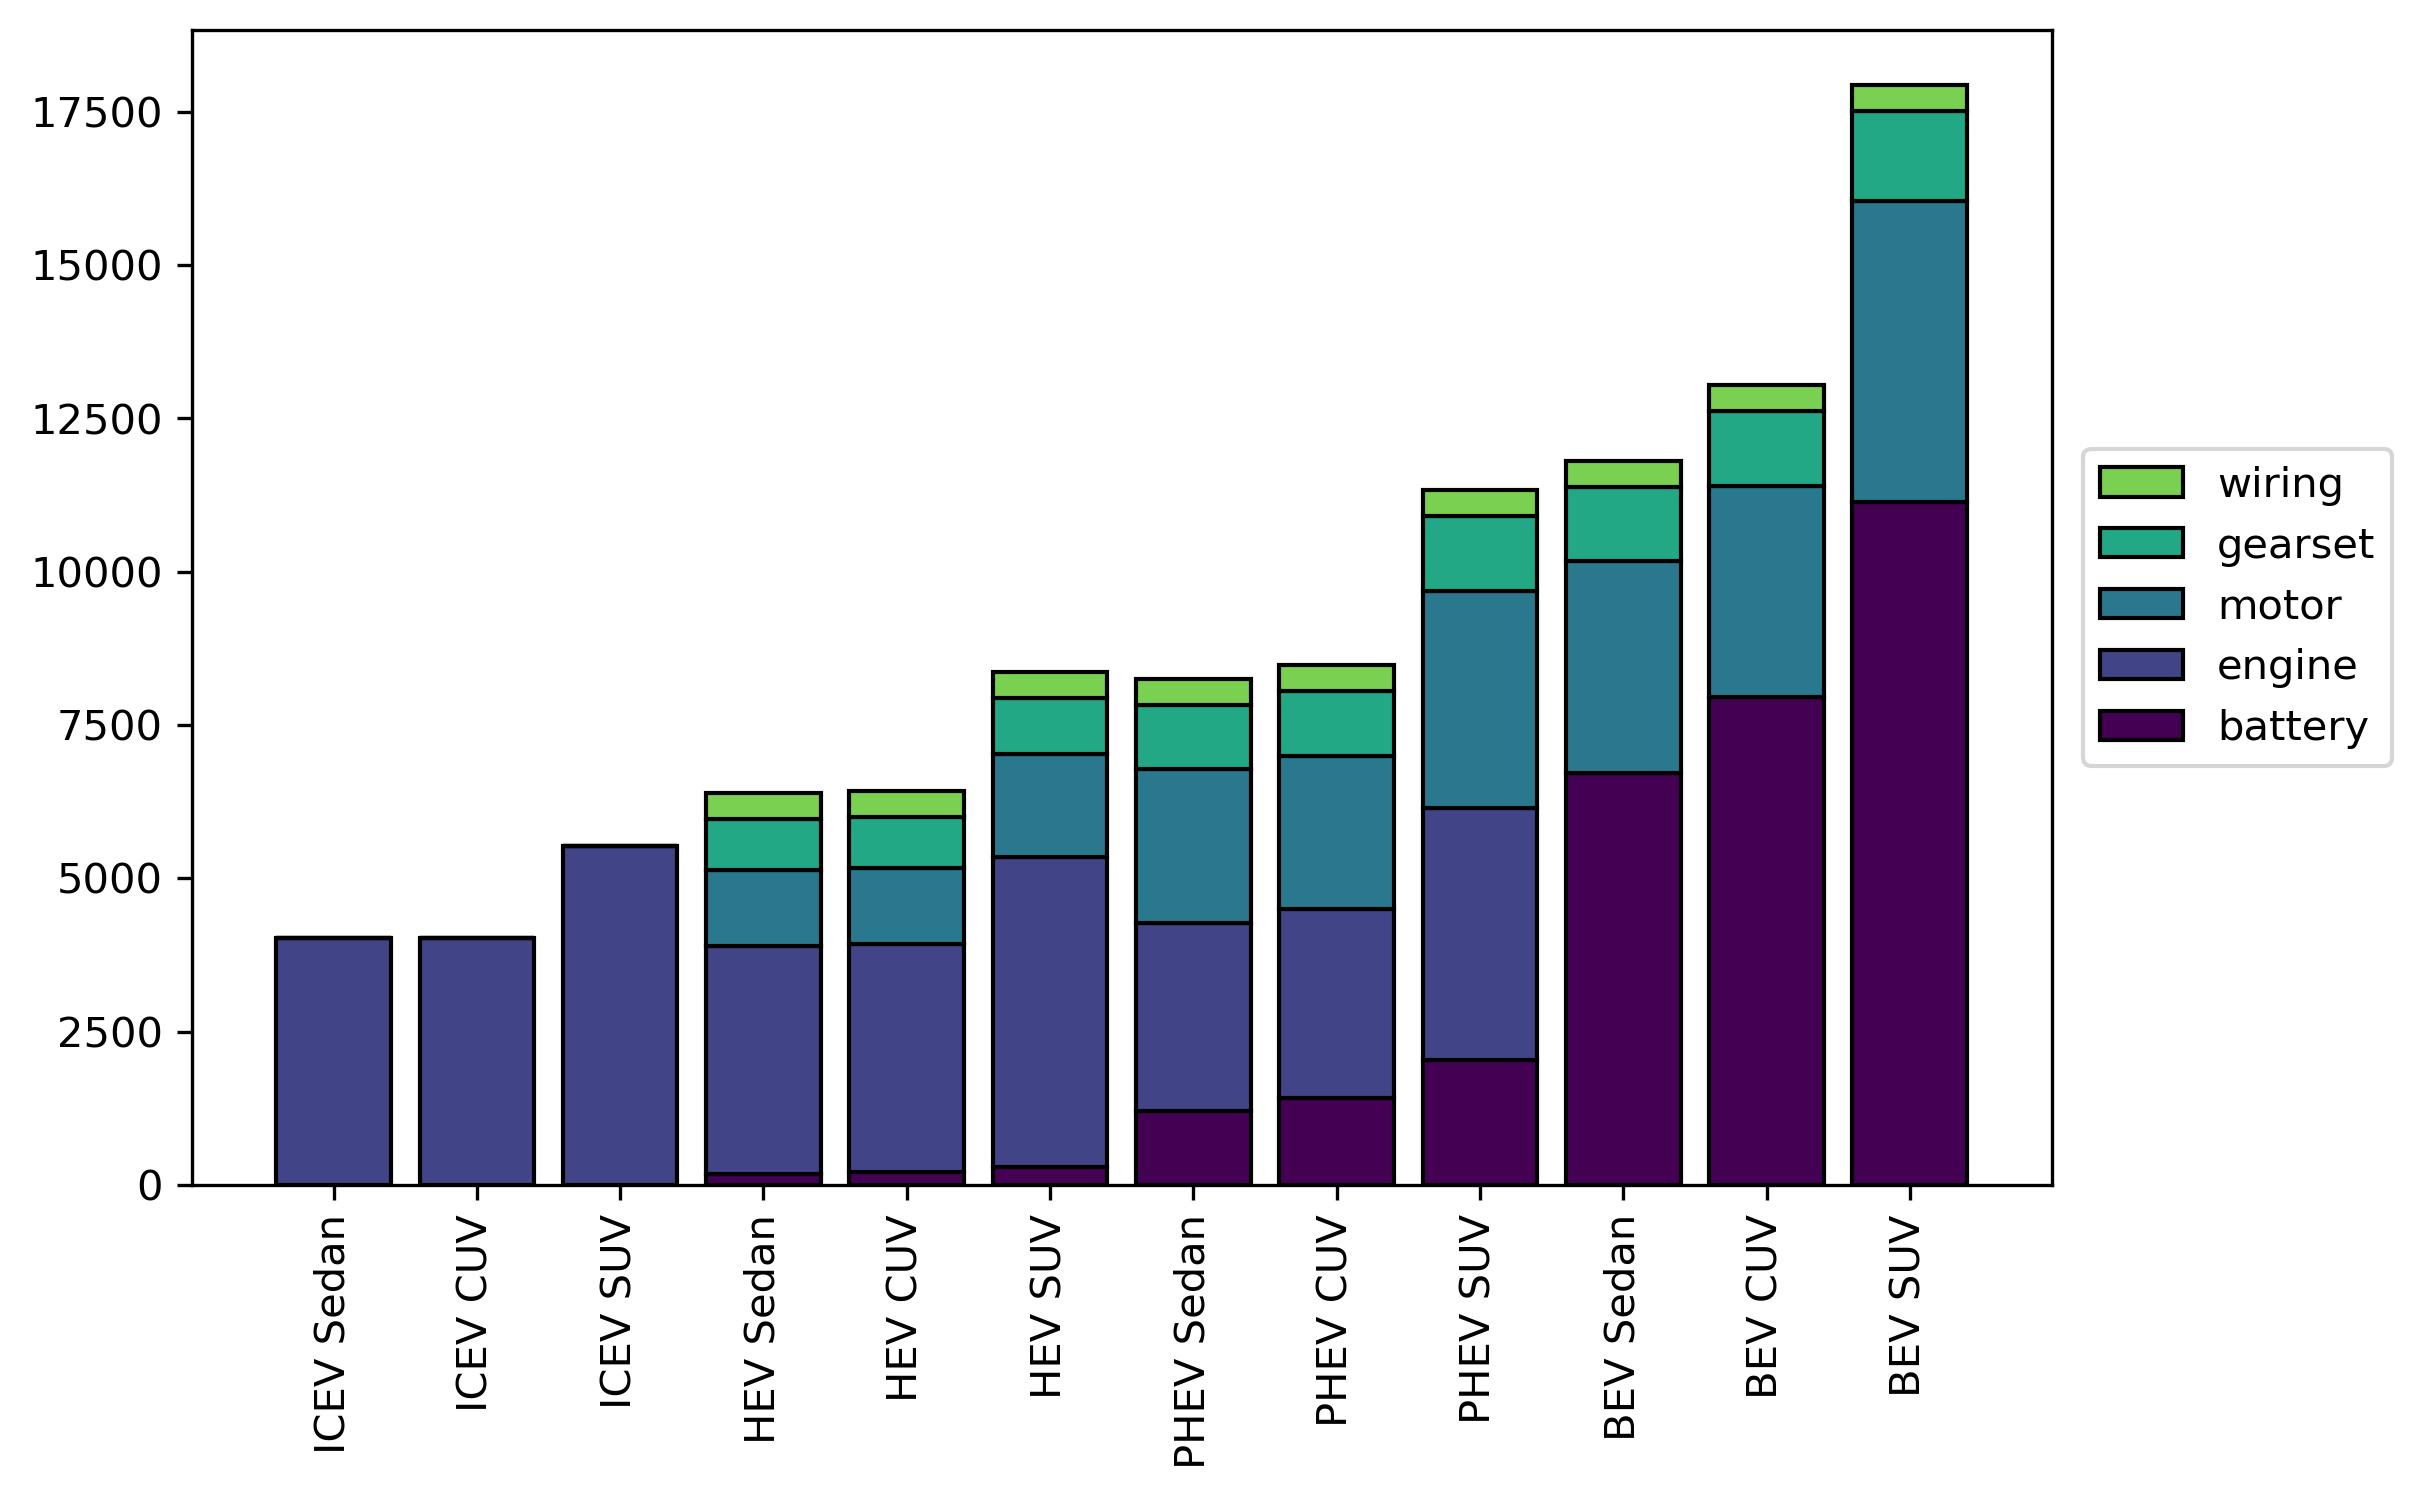

In [114]:
deep_reload(src)

fields=(['battery','engine','motor','gearset','wiring'])

data_dict={}

for field in fields:
    data_dict[field]=[]
    for key in tco.keys():
        data_dict[field].append(tco[key].costs[field])

fig,ax=plt.subplots(figsize=(8,5),dpi=300)

axes_kwargs={}

bar_kwargs={
    'ec':'k'
}

legend_kwargs={
    'bbox_to_anchor':(1.1,.5),
    'loc':'center'
}

src.figures.PlotStackedBar(
    data_dict,ax=ax,
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs)

labels=([f'{pt} {cs}' for pt in ['ICEV','HEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])
_=ax.set_xticks(list(range(12)),labels,rotation=90)

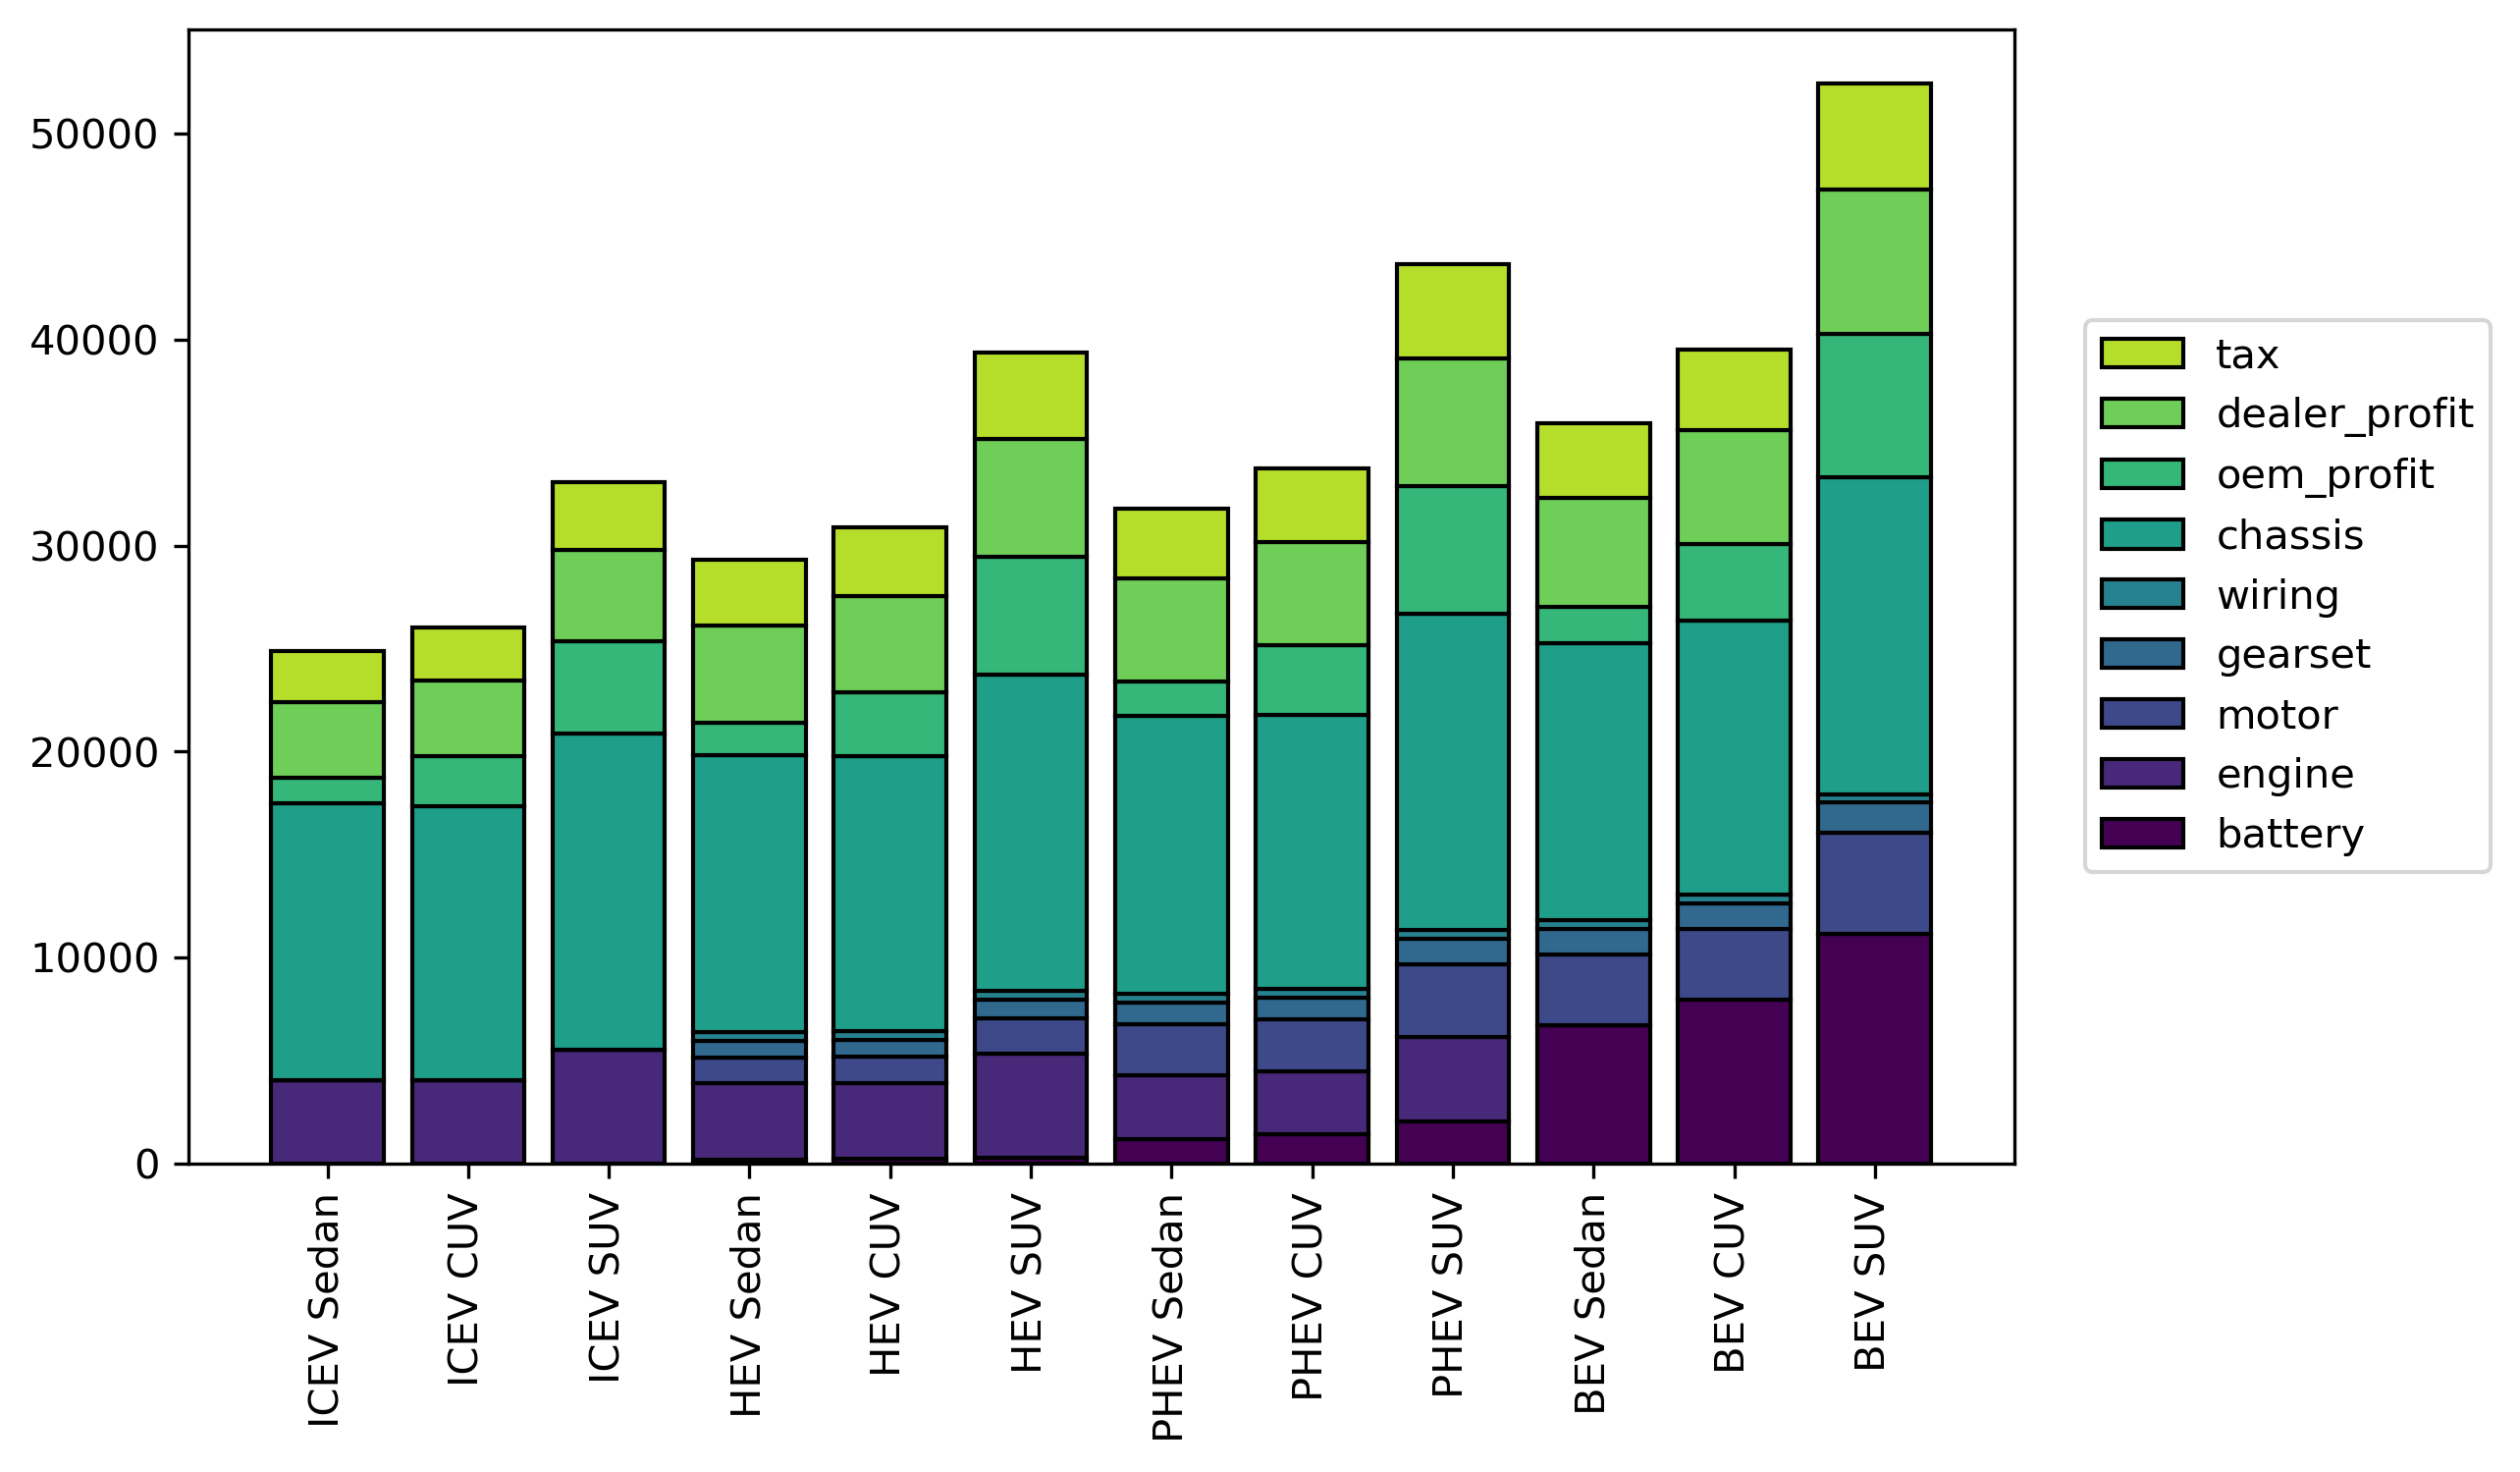

In [116]:
deep_reload(src)

fields=(['battery','engine','motor','gearset','wiring','chassis',
         'oem_profit','dealer_profit','tax'])

data_dict={}

for field in fields:
    data_dict[field]=[]
    for key in tco.keys():
        data_dict[field].append(tco[key].costs[field])

fig,ax=plt.subplots(figsize=(8,5),dpi=300)

axes_kwargs={}

bar_kwargs={
    'ec':'k'
}

legend_kwargs={
    'bbox_to_anchor':(1.15,.5),
    'loc':'center'
}

src.figures.PlotStackedBar(
    data_dict,ax=ax,
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs)

labels=([f'{pt} {cs}' for pt in ['ICEV','HEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])
_=ax.set_xticks(list(range(12)),labels,rotation=90)

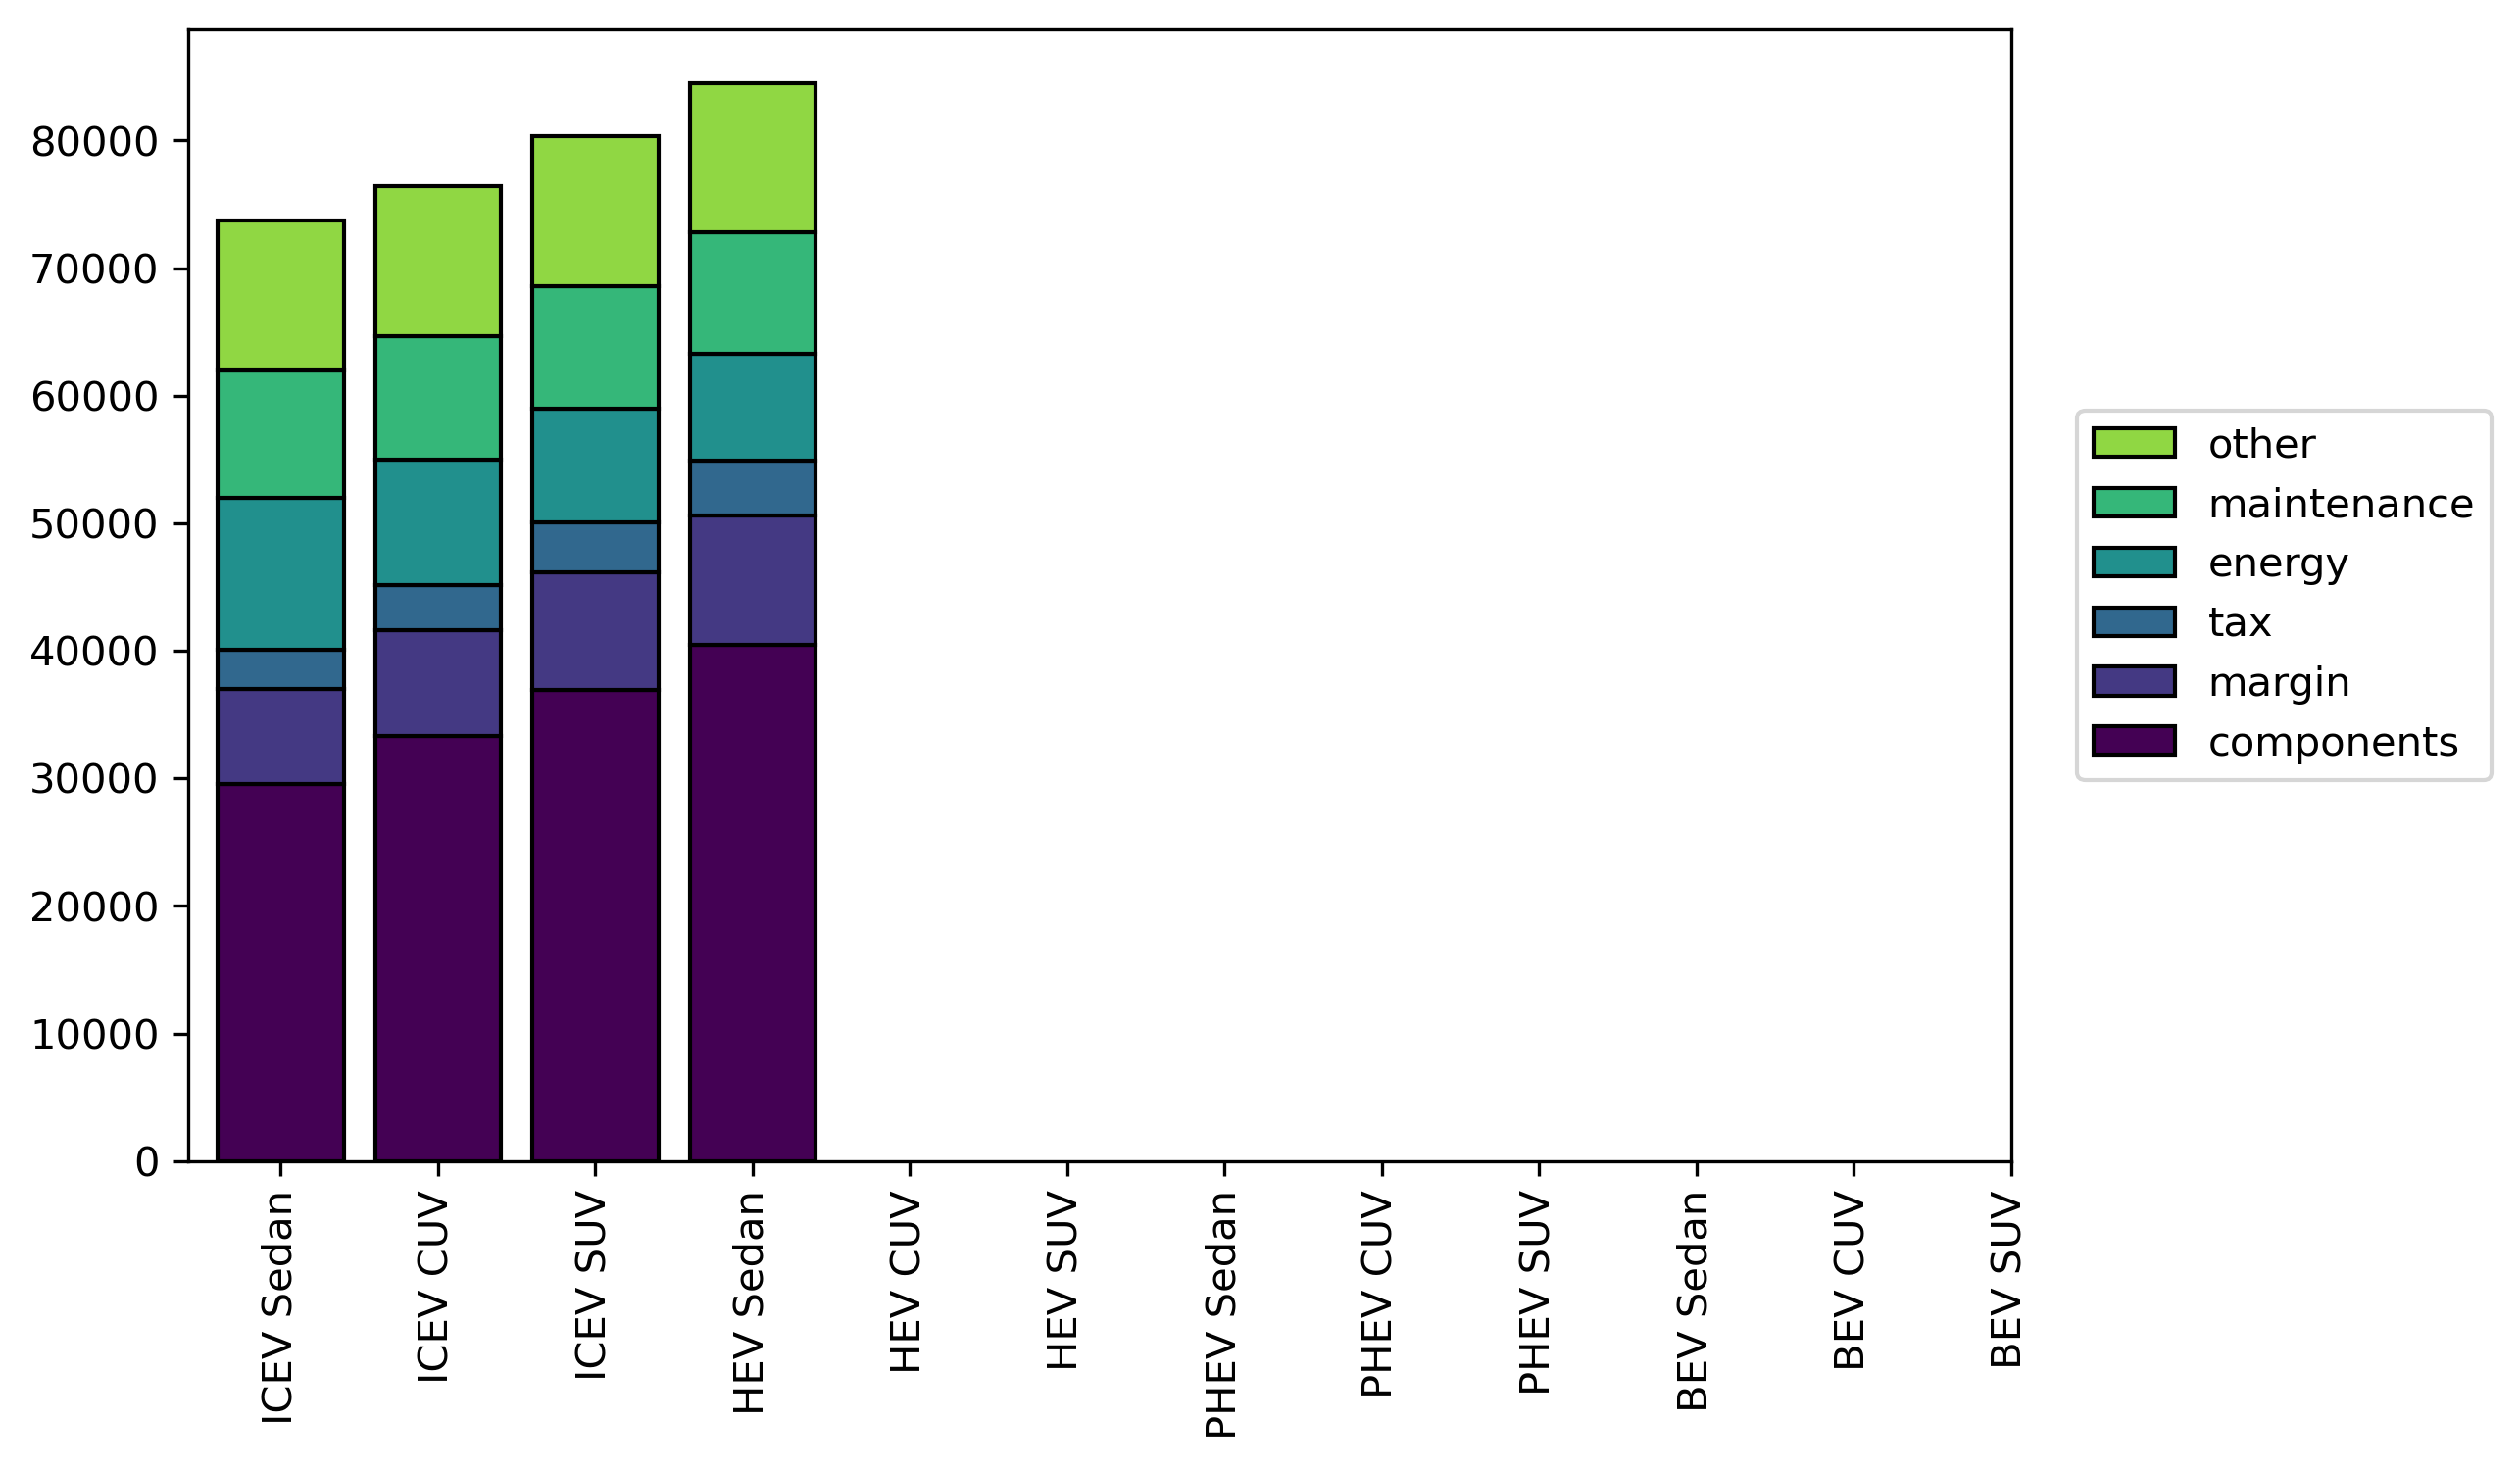

In [160]:
deep_reload(src)

parameters_phev_cuv=parameters.parameters_phev_cuv

tco={}

tco['bev_cuv_100']=src.cost.Vehicle(
    parameters.parameters_bev_cuv,
    {'all_electric_range':100e3},
)

tco['bev_cuv_200']=src.cost.Vehicle(
    parameters.parameters_bev_cuv,
    {'all_electric_range':200e3},
)

tco['bev_cuv_300']=src.cost.Vehicle(
    parameters.parameters_bev_cuv,
    {'all_electric_range':300e3},
)

tco['bev_cuv_400']=src.cost.Vehicle(
    parameters.parameters_bev_cuv,
    {'all_electric_range':400e3},
)

fields=['components','margin','tax','energy','maintenance','other']

data_dict={}

for field in fields:
    data_dict[field]=[]
    for key in tco.keys():
        data_dict[field].append(tco[key].costs[field])

fig,ax=plt.subplots(figsize=(8,5),dpi=300)

axes_kwargs={}

bar_kwargs={
    'ec':'k'
}

legend_kwargs={
    'bbox_to_anchor':(1.15,.5),
    'loc':'center'
}

src.figures.PlotStackedBar(
    data_dict,ax=ax,
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs)

labels=([f'{pt} {cs}' for pt in ['ICEV','HEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])
_=ax.set_xticks(list(range(12)),labels,rotation=90)

In [174]:
# Making a contour plot
deep_reload(src)

# years=np.linspace(2024,2035,15)
n=100

all_electric_range=np.linspace(0,500,n)*1e3
fuel_cost=np.linspace(2,6,n)/33.7/3.6e6

tco={
    'icev':np.zeros((n,n)),
    'hev':np.zeros((n,n)),
    'phev':np.zeros((n,n)),
    'bev':np.zeros((n,n)),
}

for idx0 in range(n):
    for idx1 in range(n):
        
        inputs={
            'fuel_cost':fuel_cost[idx0],
        }
        # print(inputs)
        
        icev=src.cost.Vehicle(parameters.parameters_icev_cuv,inputs)
        hev=src.cost.Vehicle(parameters.parameters_hev_cuv,inputs)
        
        inputs['all_electric_range']=all_electric_range[idx1]
        
        phev=src.cost.Vehicle(parameters.parameters_phev_cuv,inputs)
        bev=src.cost.Vehicle(parameters.parameters_bev_cuv,inputs)
        # print(icev.costs['total'],hev.costs['total'],
        #       phev.costs['total'],bev.costs['total'])
        # break
        
        tco['icev'][idx0,idx1]=icev.costs['total']
        tco['hev'][idx0,idx1]=hev.costs['total']
        tco['phev'][idx0,idx1]=phev.costs['total']
        tco['bev'][idx0,idx1]=bev.costs['total']

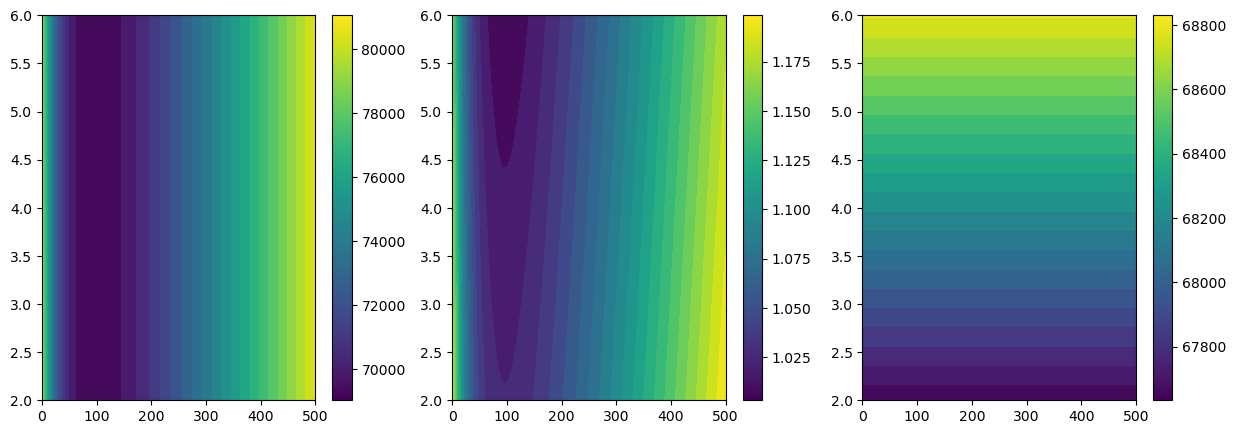

In [175]:
deep_reload(src)

fig,ax=plt.subplots(1,3,figsize=(15,5))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6

z=tco['bev']
src.figures.PlotContour(x,y,z,ax=ax[0],contourf_kwargs={'levels':20})

z=tco['bev']/tco['icev']
src.figures.PlotContour(x,y,z,ax=ax[1],contourf_kwargs={'levels':20})

z=tco['icev']
src.figures.PlotContour(x,y,z,ax=ax[2],contourf_kwargs={'levels':20})

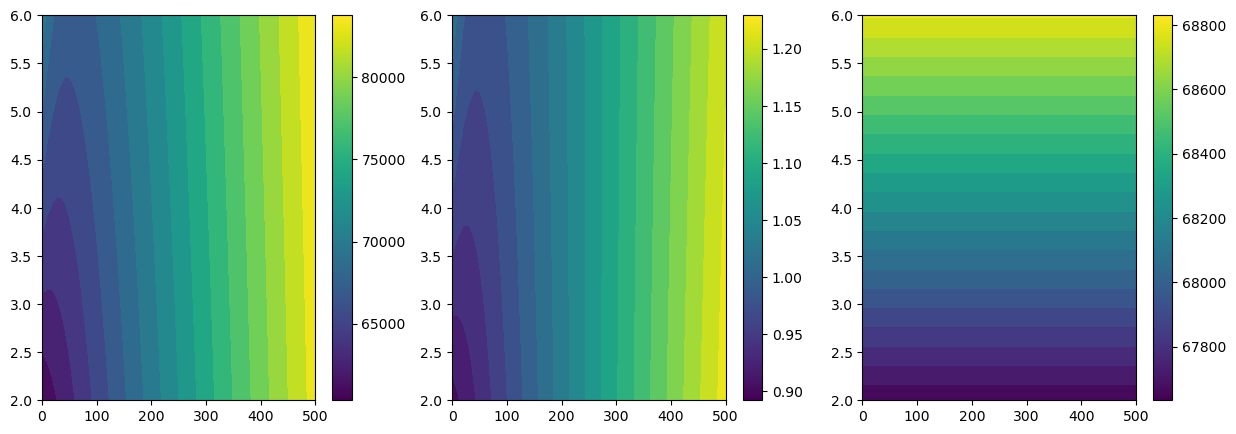

In [176]:
deep_reload(src)

fig,ax=plt.subplots(1,3,figsize=(15,5))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6

z=tco['phev']
src.figures.PlotContour(x,y,z,ax=ax[0],contourf_kwargs={'levels':20})

z=tco['phev']/tco['icev']
src.figures.PlotContour(x,y,z,ax=ax[1],contourf_kwargs={'levels':20})

z=tco['icev']
src.figures.PlotContour(x,y,z,ax=ax[2],contourf_kwargs={'levels':20})

Text(0, 0.5, 'Gasoline Price per Gallon (US) [$]')

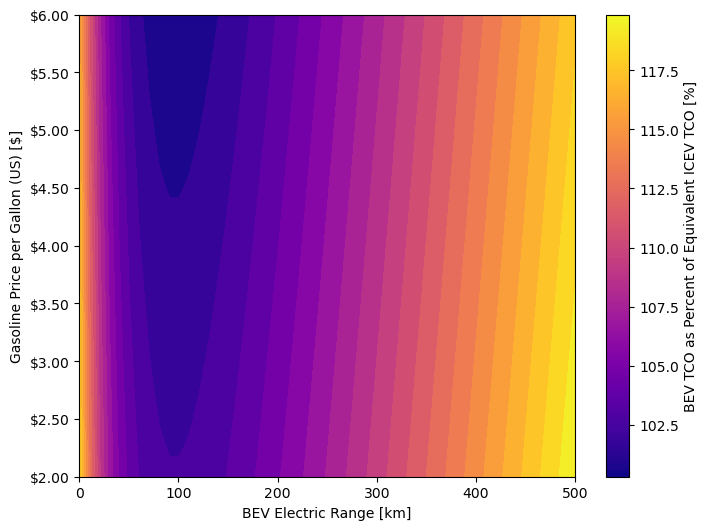

In [210]:
deep_reload(src)

fig,ax=plt.subplots(1,1,figsize=(8,6))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6
z=(tco['bev']-tco['icev'])/tco['icev']*100+100

contourf_kwargs={
    'levels':20,
}

colorbar_kwargs={
    'label':'BEV TCO as Percent of Equivalent ICEV TCO [%]',
    # 'format':"{x:,.1\%}",
}

cmap=src.figures.ReturnColorMap('plasma')

src.figures.PlotContour(
    x,y,z,ax=ax,cmap=cmap,
    contourf_kwargs=contourf_kwargs,
    contour_kwargs=contour_kwargs,
    colorbar_kwargs=colorbar_kwargs,
)

ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('BEV Electric Range [km]')
ax.set_ylabel('Gasoline Price per Gallon (US) [$]')

In [216]:
# Making a contour plot
deep_reload(src)

# years=np.linspace(2024,2035,15)
n=100

all_electric_range=np.linspace(0,100,n)*1e3
fuel_cost=np.linspace(2,6,n)/33.7/3.6e6

tco={
    'icev':np.zeros((n,n)),
    'hev':np.zeros((n,n)),
    'phev':np.zeros((n,n)),
    'bev':np.zeros((n,n)),
}

uf={
    'icev':np.zeros((n,n)),
    'hev':np.zeros((n,n)),
    'phev':np.zeros((n,n)),
    'bev':np.zeros((n,n)),
}

for idx0 in range(n):
    for idx1 in range(n):
        
        inputs={
            'fuel_cost':fuel_cost[idx0],
        }
        # print(inputs)
        
        icev=src.cost.Vehicle(parameters.parameters_icev_cuv,inputs)
        hev=src.cost.Vehicle(parameters.parameters_hev_cuv,inputs)
        
        inputs['all_electric_range']=all_electric_range[idx1]
        
        phev=src.cost.Vehicle(parameters.parameters_phev_cuv,inputs)
        bev=src.cost.Vehicle(parameters.parameters_bev_cuv,inputs)
        # print(icev.costs['total'],hev.costs['total'],
        #       phev.costs['total'],bev.costs['total'])
        # break
        
        tco['icev'][idx0,idx1]=icev.costs['total']
        tco['hev'][idx0,idx1]=hev.costs['total']
        tco['phev'][idx0,idx1]=phev.costs['total']
        tco['bev'][idx0,idx1]=bev.costs['total']
        
        uf['icev'][idx0,idx1]=icev.params['utility_factor']
        uf['hev'][idx0,idx1]=hev.params['utility_factor']
        uf['phev'][idx0,idx1]=phev.params['utility_factor']
        uf['bev'][idx0,idx1]=bev.params['utility_factor']

Text(0, 0.5, 'Gasoline Price per Gallon (US) [$]')

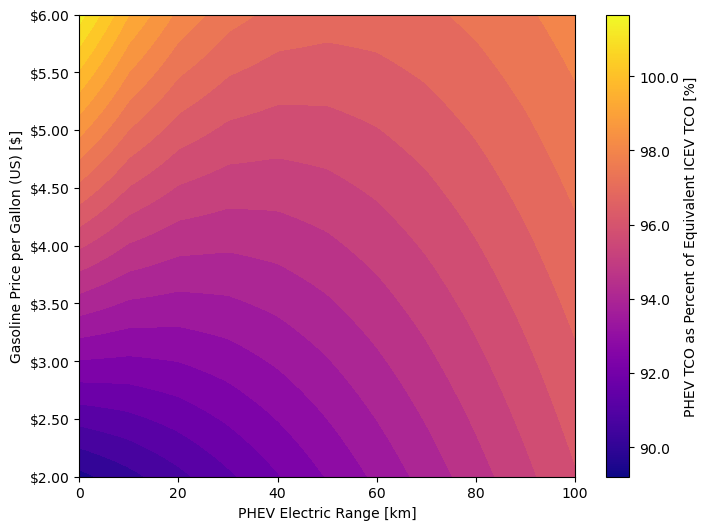

In [215]:
deep_reload(src)

fig,ax=plt.subplots(1,1,figsize=(8,6))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6
z=(tco['phev']-tco['icev'])/tco['icev']*100+100

contourf_kwargs={
    'levels':20,
}

colorbar_kwargs={
    'label':'PHEV TCO as Percent of Equivalent ICEV TCO [%]',
    'format':"{x:.1f}",
}

cmap=src.figures.ReturnColorMap('plasma')

src.figures.PlotContour(
    x,y,z,ax=ax,cmap=cmap,
    contourf_kwargs=contourf_kwargs,
    contour_kwargs=contour_kwargs,
    colorbar_kwargs=colorbar_kwargs,
)

ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('PHEV Electric Range [km]')
ax.set_ylabel('Gasoline Price per Gallon (US) [$]')

Text(0, 0.5, 'Gasoline Price per Gallon (US) [$]')

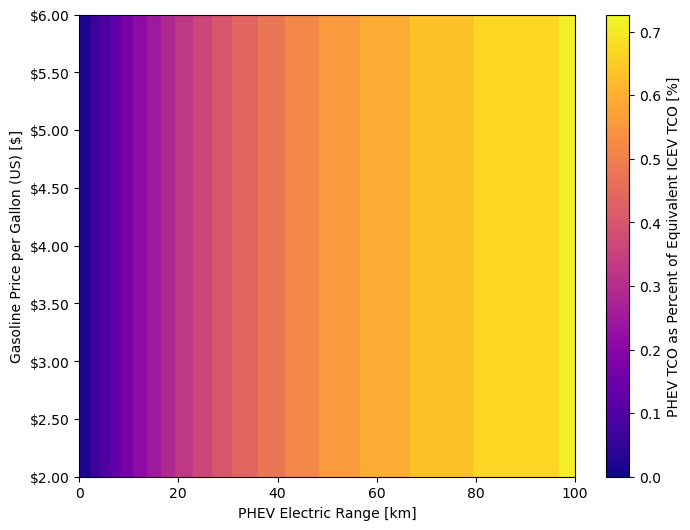

In [217]:
deep_reload(src)

fig,ax=plt.subplots(1,1,figsize=(8,6))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6
z=uf['phev']

contourf_kwargs={
    'levels':20,
}

colorbar_kwargs={
    'label':'PHEV TCO as Percent of Equivalent ICEV TCO [%]',
    'format':"{x:.1f}",
}

cmap=src.figures.ReturnColorMap('plasma')

src.figures.PlotContour(
    x,y,z,ax=ax,cmap=cmap,
    contourf_kwargs=contourf_kwargs,
    contour_kwargs=contour_kwargs,
    colorbar_kwargs=colorbar_kwargs,
)

ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('PHEV Electric Range [km]')
ax.set_ylabel('Gasoline Price per Gallon (US) [$]')